In [8]:
%matplotlib inline

In [9]:
from parsing import parser, digit
from plotting import plotter

In [22]:
parse = parser.Parser();
train_digits = parse.parse_file('data/pendigits-train');
test_digits = parse.parse_file('data/pendigits-test')

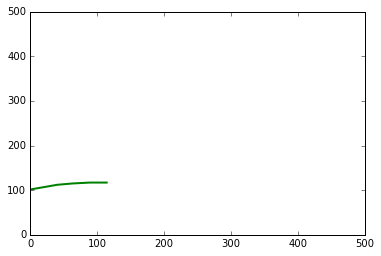

In [23]:
plotter.plot_digit(train_digits[8])